> [ChatGPT 对话](https://chatgpt.com/share/68ff7ec7-1280-8005-a63b-11ce2a8fef78)

下面我为上面那篇小品文配备 **4 幅配图**，每一幅都服务于文中一个关键逻辑点，并且都附有 **可直接在 VS Code 中运行的 Python 代码**（用 `matplotlib`）。

每幅图的设计理念是“简洁、可嵌入、概念清晰”，你可以运行后导出 `.png` 插入推文或讲义。



---

# 小品插画合集：配合《年薪百万的统计真相》

---

## 图 1. 样本与总体：你看到的只是冰山一角

**讲解位置**：对应“第三部分：从样本到总体”
**目的**：说明 sample（你看到的部分）与 population（你想知道的总体）的关系。



##提示词：

后文运行代码后，图片自动保存到 .ipynb 文件所在文件夹中的 'figures' 子文件夹中。
请编写 Python 代码实现上述要求。

In [5]:
import os
import numpy as np

import matplotlib.pyplot as plt

# 创建 figures 文件夹（如果不存在）
figures_dir = 'figures'
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

# 设置保存图片的函数
def save_figure(fig, filename):
    """保存图片到 figures 文件夹"""
    filepath = os.path.join(figures_dir, filename)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
    print(f"图片已保存到: {filepath}")

# 重写 plt.show() 函数，使其同时保存图片
original_show = plt.show
figure_counter = 0

def custom_show():
    global figure_counter
    figure_counter += 1
    
    # 获取当前图形
    fig = plt.gcf()
    
    # 生成文件名
    filename = f"figure_{figure_counter}.png"
    
    # 保存图片
    save_figure(fig, filename)
    
    # 显示图片
    original_show()

# 替换 plt.show
plt.show = custom_show

print("设置完成！后续运行的图片将自动保存到 'figures' 文件夹中。")

设置完成！后续运行的图片将自动保存到 'figures' 文件夹中。


图片已保存到: figures\figure_1.png


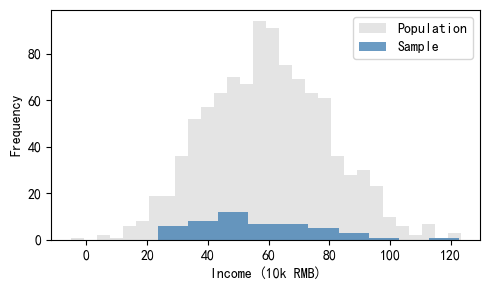

Sample: number of incomes >= 100 (万元 RMB): 2
Sample values >= 100 (万元 RMB): [123 101]
图片已保存到: figures\B866-sample-population.png


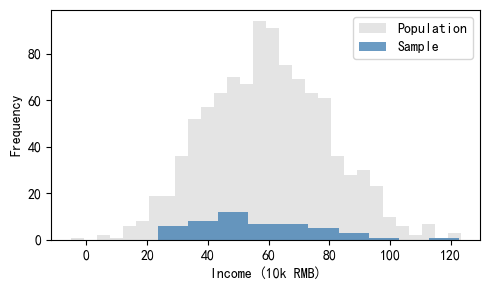

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# 支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 构造总体数据
np.random.seed(401)  # 401
population = np.random.normal(60, 20, 1000)

# 抽取样本
sample = np.random.choice(population, 50, replace=False)

plt.figure(figsize=(5, 3))
plt.hist(population, bins=30, color='lightgray', label='Population', alpha=0.6)
plt.hist(sample, bins=10, color='steelblue', label='Sample', alpha=0.8)
plt.xlabel("Income (10k RMB)")
plt.ylabel("Frequency")
#plt.title("Population vs. Sample")
plt.legend()
plt.tight_layout()
plt.show()

#统计 Sample 中收入大于等于 100w 的人数，并打印这些观察值的具体数值 (取整数部分)
sample_ge_100 = sample[sample >= 100]
count_sample_ge_100 = int(sample_ge_100.size)

print(f"Sample: number of incomes >= 100 (万元 RMB): {count_sample_ge_100}")
print(f"Sample values >= 100 (万元 RMB): {np.round(sample_ge_100, 0).astype(int)}")

#保存图片到 figures 文件夹中，文件名为 B866-sample-population.png
plt.figure(figsize=(5, 3))
plt.hist(population, bins=30, color='lightgray', label='Population', alpha=0.6)
plt.hist(sample, bins=10, color='steelblue', label='Sample', alpha=0.8)
plt.xlabel("Income (10k RMB)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'B866-fig01-sample-population.png'), dpi=300, bbox_inches='tight')
print(f"图片已保存到: {os.path.join(figures_dir, 'B866-sample-population.png')}")


**图形解释**：灰色区域代表总体（真实但未知的分布），蓝色柱状部分代表样本。

统计学的任务就是：基于蓝色部分 (Sample) 的信息，推断灰色整体 (Population)。

提示词：

绘制 Sample 的柱状图，以 10w 为区间，显示样本数据的分布情况。
- 柱状图的纵轴为频数，横轴为年薪区间 (10, 20, ..., 120)。
- 年薪 >= 100w 的样本数据用红色标记，突出显示高收入个体在样本中的位置。同时，在柱体的上方标记具体的频数值，便于观察。
- 支持中文字符显示。

图片已保存到: figures\figure_2.png


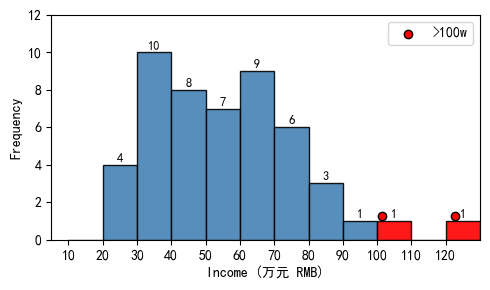

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# 绘制 sample 的柱状图，区间为 10,20,...,120；>100 的样本用红色标记并在柱体上方标注频数
bins = np.arange(10, 140, 10)  # edges: 10,20,...,120,130 (把 >120 的值也纳入最后一档)
counts, edges = np.histogram(sample, bins=bins)
bin_width = edges[1] - edges[0]

# 柱体颜色：左边界 >= 100 的柱体用红色
colors = ['red' 
            if left >= 100 
            else 'steelblue' 
            for left in edges[:-1]]

plt.figure(figsize=(5, 3))
plt.bar(edges[:-1], counts, 
        width=bin_width, align='edge', 
        color=colors, edgecolor='k', alpha=0.9)

# 在柱体上方标注具体的频数
for left, cnt in zip(edges[:-1], counts):
    if cnt > 0:
        plt.text(left + bin_width / 2, 
                 cnt + 0.05, 
                 str(int(cnt)), 
                 ha='center', va='bottom', 
                 fontsize=9)

# 用红点高亮标注单个 >100 的样本点，放在对应柱体上方
high_vals = sample[sample > 100]
if high_vals.size > 0:
    # 计算每个 high_val 对应的柱高（以便把点放在柱顶上方）
    hist_all, _ = np.histogram(sample, bins=bins)
    y_positions = []
    for v in high_vals:
        idx = np.searchsorted(edges, v, side='right') - 1
        # 当 v 超出 edges 范围时，searchsorted 会返回 len(edges)，导致 idx == len(edges)-1
        # 但 hist_all 的长度为 len(edges)-1，因此需要将 idx 限制到合法范围 [0, hist_all.size-1]
        idx = int(np.clip(idx, 0, hist_all.size - 1))
        y_positions.append(hist_all[idx] + 0.25)
    plt.scatter(high_vals, 
                y_positions, 
                color='red', edgecolor='k', 
                zorder=5, label='>100w')

plt.xlabel("Income (万元 RMB)")
plt.ylabel("Frequency")
#plt.title("Sample Income Distribution (bins = 10k); 高于100w 用红色标记")
plt.xticks(np.arange(10, 121, 10))
plt.ylim(0, max(counts) + 2)
plt.xlim(5, 130)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(figures_dir, 'B866-fig02-outliers.png'), dpi=300, bbox_inches='tight')
print(f"图片已保存到: {os.path.join(figures_dir, 'B866-fig02-outliers.png')}")

## 图 2. 条件的重要性：不同条件，不同世界

**讲解位置**：对应“第四部分：条件的重要性”
**目的**：展示“条件期望”如何改变分布（MIT博士 vs 普通毕业生）。



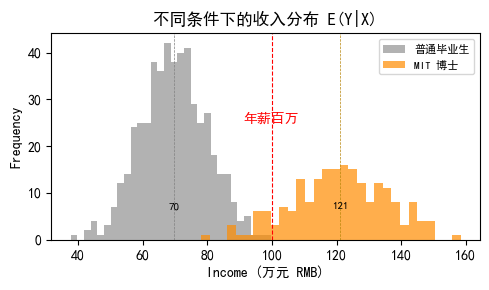

In [ ]:
# add two vertical dashed lines at the sample means of the two sub-samples
mean_normal = np.mean(normal_grad)
mean_mit = np.mean(mit_grad)

plt.figure(figsize=(5, 3))
plt.hist(normal_grad, bins=30, color='gray', alpha=0.6, label='普通毕业生')
plt.hist(mit_grad, bins=30, color='darkorange', alpha=0.7, label='MIT 博士')
plt.legend(fontsize=8)  # 设置图例字号为8pt

# existing million-yuan marker
plt.axvline(100, color='red', linestyle='--', lw=0.8)
plt.text(91.2, 25, "年薪百万", color='red', fontsize=10)

# add two dashed vertical lines at the two sample means
plt.axvline(mean_normal, color='gray', linestyle='--', lw=0.5)
plt.axvline(mean_mit, color='darkgoldenrod', linestyle='--', lw=0.5)

# annotate the means
ymax = plt.ylim()[1]
plt.text(mean_normal - 1.5, 8, f'{mean_normal:.0f}', color='black', fontsize=8, va='top')
plt.text(mean_mit - 2.5, 8, f'{mean_mit:.0f}', color='black', fontsize=8, va='top')

plt.xlabel("Income (万元 RMB)")
plt.ylabel("Frequency")
plt.title("不同条件下的收入分布 E(Y|X)")
plt.tight_layout()
plt.show()

plt.savefig(os.path.join(figures_dir, 'B866-fig03-low-vs-high.png'), dpi=300, bbox_inches='tight')
print(f"图片已保存到: {os.path.join(figures_dir, 'B866-fig03-low-vs-high.png')}")

添加几段简洁的文字，解释上面的图形

**图形解释**：
橙色分布（MIT博士）右移，说明条件不同，期望值也不同。
→ “年薪百万”不是平均水平，而是**给定条件下的期望值**。





## 图 3. 平均数的幻觉：右偏分布下的“年薪百万”

**讲解位置**：对应“第五部分：平均数的幻觉”
**目的**：展示右偏分布与均值、众数、中位数的差距。



### 提示词

构造一个右偏分布的数据集，N = 500，绘制其直方图，并标记均值、中位数和众数的位置。
- 要体现：“平均年薪百万”往往是**极少数人抬高的幻觉** 这一思想。
- x 左侧的数据可以使用具有右拖尾特征的分布来生成，也可以使用混合分布来生成，比如 Group 1：约占 30%，mean=20w，Group 2：约占 50%，mean=50w，Group 3：约占 20%，mean=80w。这样可以形成一个右偏分布的基础。
- x 的在右侧的取值可以不连续，存在 5% 左右的离群值，他们年薪可能超过 300w，极个别甚至达到 700w。这样才可以体现右偏分布的特征。这些极端值可以通过后期修改或添加的方式生成。
- 确保 x 的均值为 100w 左右，中位数约为 50w。
- 均值用虚线表示，中位数和众数用实线表示，并在图例中注明。
- 左图：显示完整的分布情况，右图：聚焦在 300w 以下的部分，突出显示均值、中位数和众数的位置。


### 提示词

构造一个**右偏分布的年薪数据集**（N = 500），并通过可视化揭示“平均年薪百万”这一**由少数极端值造成的幻觉**。

### 1. 数据生成要求

* 样本总量：N = 100
* 分布结构：可使用混合分布或右拖尾分布构造。

  * Group 1（低收入群体）：约占 30%，均值 30 万
  * Group 2（中等收入群体）：约占 50%，均值 50 万
  * Group 3（高收入群体）：约占 20%，均值 80 万
* 在此基础上，人工添加约 5-10% 的极端高收入者（离群值），其年薪可超过 300 万，极少数甚至达到 700 万。这些数值主要是确保分布的右偏特征，同时起到调节作用使均值在 100w 左右。
* 调整参数以确保总体均值约为 100 万，中位数约为 50 万。

### 2. 图形绘制要求

绘制两个并列直方图（左、右各一幅）：

1. **左图**：展示完整的分布（包括极端值），显示数据整体的右偏特征。
2. **右图**：仅显示 300 万以下的部分，用以突出主体人群分布。超过 300w 的部分用折断线 (闪电箭头方式) 表示。

### 3. 图形标注要求

* 在两幅图中均标注：

  * **均值**（Mean）：用虚线表示；
  * **中位数**（Median）：用实线表示；

* 在图例中注明三者含义；
* 适当调整坐标比例，使分布形状清晰可辨。

### 4. 输出目标

* 图形能直观体现“均值被少数极端值拉高”；
* 观者能清晰看到中位数和众数远低于均值，从而理解“平均年薪百万”只是统计幻觉。


均值: 81.1 万, 中位数: 49.5 万, 众数: 20.4 万


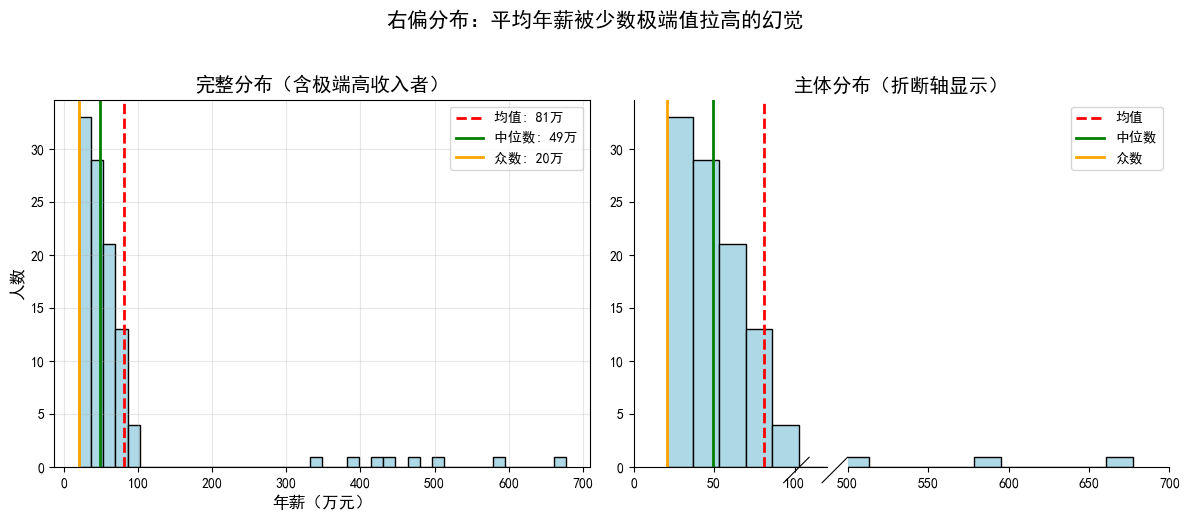

In [ ]:
# ---------------------------------------------------------------
# 高级版：右偏年薪分布（带折断轴展示）
# 目的：揭示“平均年薪百万”被极少数极端值拉高的幻觉
# ---------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from brokenaxes import brokenaxes  # pip install brokenaxes

# 1. 数据生成 ---------------------------------------------------
np.random.seed(42)

# 低收入群体（约30%，均值30w）
g1 = np.random.normal(loc=30, scale=5, size=30)
# 中等收入群体（约50%，均值50w）
g2 = np.random.normal(loc=50, scale=10, size=50)
# 高收入群体（约20%，均值80w）
g3 = np.random.normal(loc=80, scale=15, size=20)

# 合并主体群体
x = np.concatenate([g1, g2, g3])

# 添加极端高收入者（5–10%）
outliers = np.random.uniform(low=300, high=700, size=8)
x = np.concatenate([x, outliers])

# 计算统计量
mean_x = np.mean(x)
median_x = np.median(x)
mode_x = stats.mode(x, keepdims=True)[0][0]

print(f"均值: {mean_x:.1f} 万, 中位数: {median_x:.1f} 万, 众数: {mode_x:.1f} 万")

# 2. 图形设置 ---------------------------------------------------
fig = plt.figure(figsize=(12, 5))

# 左图：完整分布（包括极端值）
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(x, bins=40, color='lightblue', edgecolor='black')
ax1.axvline(mean_x, color='red', linestyle='--', linewidth=2, label=f'均值: {mean_x:.0f}万')
ax1.axvline(median_x, color='green', linestyle='-', linewidth=2, label=f'中位数: {median_x:.0f}万')
ax1.axvline(mode_x, color='orange', linestyle='-', linewidth=2, label=f'众数: {mode_x:.0f}万')
ax1.set_title('完整分布（含极端高收入者）', fontsize=14)
ax1.set_xlabel('年薪（万元）', fontsize=12)
ax1.set_ylabel('人数', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)

# 右图：折断轴展示（主体分布）
# brokenaxes 允许在横轴上定义多个区间，如 0–300 与 300–700 之间断开
bax = brokenaxes(xlims=((0, 120), (500, 700)), subplot_spec=fig.add_gridspec(1, 2)[0, 1])
bax.hist(x, bins=40, color='lightblue', edgecolor='black')
bax.axvline(mean_x, color='red', linestyle='--', linewidth=2, label='均值')
bax.axvline(median_x, color='green', linestyle='-', linewidth=2, label='中位数')
bax.axvline(mode_x, color='orange', linestyle='-', linewidth=2, label='众数')
bax.set_title('主体分布（折断轴显示）', fontsize=14)
bax.legend(fontsize=10)

# 统一图形样式
fig.suptitle('右偏分布：平均年薪被少数极端值拉高的幻觉', fontsize=15, y=1.03)
plt.tight_layout()
plt.show()

plt.savefig(os.path.join(figures_dir, 'B866-fig04-very-high.png'), dpi=300, bbox_inches='tight')
print(f"图片已保存到: {os.path.join(figures_dir, 'B866-fig04-very-high.png')}")


**图形解释**：

* 红线（均值） > 黑线（中位数）；
* 右尾拖长，由少数高薪者造成；
* “平均年薪百万”往往是**极少数人抬高的幻觉**。



## 图 4. α 与 p-value：拒绝域的图形解释

**讲解位置**：对应“第六部分：怀疑与检验”
**目的**：直观展示显著性水平 α 与 p-value 的位置关系。



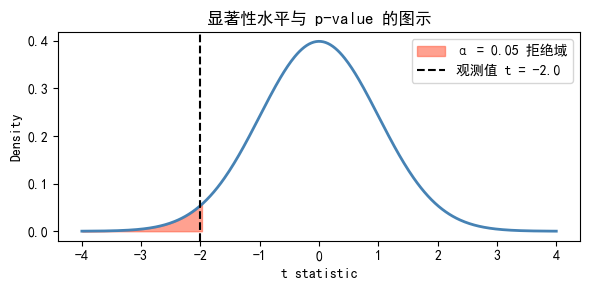

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-4, 4, 400)
y = norm.pdf(x)

plt.figure(figsize=(6, 3))
plt.plot(x, y, color='steelblue', lw=2)
plt.fill_between(x, y, where=(x < -1.96), color='tomato', alpha=0.6, label='α = 0.05 拒绝域')
plt.axvline(-2.0, color='black', linestyle='--', label='观测值 t = -2.0')
plt.xlabel("t statistic")
plt.ylabel("Density")
plt.title("显著性水平与 p-value 的图示")
plt.legend()
plt.tight_layout()
plt.show()



**图形解释**：

* 红色阴影：拒绝域（α = 0.05）；
* 虚线位置是观测的 t 值。
  若落入阴影区域（p < α），我们“拒绝 H₀”。





## 小结与建议

| 图号  | 主题       | 对应概念    | 图形风格      |       |
| --- | -------- | ------- | --------- | ----- |
| 图 1 | 样本 vs 总体 | 统计推断的起点 | 双直方图      |       |
| 图 2 | 条件期望     | E(Y     | X) 的含义    | 对比直方图 |
| 图 3 | 平均数幻觉    | 极值与偏态   | 右偏分布      |       |
| 图 4 | α 与 p 值  | 假设检验思维  | 密度 + 阴影区域 |       |





**图形解释**：
橙色分布（MIT博士）右移，说明条件不同，期望值也不同。

“年薪百万”不是平均水平，而是**给定条件下的期望值**。

---

## 图 3. 平均数的幻觉：右偏分布下的“年薪百万”

**讲解位置**：对应“第五部分：平均数的幻觉”
**目的**：展示右偏分布与均值、众数、中位数的差距。

```python
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm

# 构造右偏分布
data = skewnorm.rvs(a=8, loc=60, scale=15, size=2000)

plt.figure(figsize=(6, 3))
plt.hist(data, bins=40, density=True, color='lightsteelblue', alpha=0.8)
plt.axvline(np.mean(data), color='red', linestyle='--', label=f'均值: {np.mean(data):.1f}')
plt.axvline(np.median(data), color='black', linestyle=':', label=f'中位数: {np.median(data):.1f}')
plt.axvline(100, color='gray', linestyle='-', lw=1, label='年薪百万线')
plt.xlabel("Income (10k RMB)")
plt.ylabel("Density")
plt.title("平均数的幻觉：右偏分布拉高均值")
plt.legend()
plt.tight_layout()
plt.show()
```

**图形解释**：

* 红线（均值） > 黑线（中位数）；
* 右尾拖长，由少数高薪者造成；
* “平均年薪百万”往往是**极少数人抬高的幻觉**。

---

## 图 4. α 与 p-value：拒绝域的图形解释

**讲解位置**：对应“第六部分：怀疑与检验”
**目的**：直观展示显著性水平 α 与 p-value 的位置关系。

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-4, 4, 400)
y = norm.pdf(x)

plt.figure(figsize=(6, 3))
plt.plot(x, y, color='steelblue', lw=2)
plt.fill_between(x, y, where=(x < -1.645), color='tomato', alpha=0.6, label='α = 0.05 拒绝域')
plt.axvline(-2.0, color='black', linestyle='--', label='观测值 t = -2.0')
plt.xlabel("t statistic")
plt.ylabel("Density")
plt.title("显著性水平与 p-value 的图示")
plt.legend()
plt.tight_layout()
plt.show()
```

**图形解释**：

* 红色阴影：拒绝域（α = 0.05）；
* 虚线位置是观测的 t 值。
  若落入阴影区域（p < α），我们“拒绝 H₀”。

---

## 小结与建议

| 图号  | 主题       | 对应概念    | 图形风格      |       |
| --- | -------- | ------- | --------- | ----- |
| 图 1 | 样本 vs 总体 | 统计推断的起点 | 双直方图      |       |
| 图 2 | 条件期望     | E(Y     | X) 的含义    | 对比直方图 |
| 图 3 | 平均数幻觉    | 极值与偏态   | 右偏分布      |       |
| 图 4 | α 与 p 值  | 假设检验思维  | 密度 + 阴影区域 |       |

---

是否希望我再补一张 “假设检验决策树” 的 **mermaid 图**（展示从问题 → 假设 → 样本 → 检验 → 结论 的流程）？
它放在文末可以总结整篇小品的逻辑脉络。




**图形解释**：
灰色区域代表总体（真实但未知的分布），蓝色柱状部分代表样本。
→ **统计学的任务就是：从蓝色部分，推断灰色整体。**

---

## 图 2. 条件的重要性：不同条件，不同世界

**讲解位置**：对应“第四部分：条件的重要性”
**目的**：展示“条件期望”如何改变分布（MIT博士 vs 普通毕业生）。

```python
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)

# 普通毕业生与MIT博士两个条件下的分布
normal_grad = np.random.normal(70, 10, 500)
mit_grad = np.random.normal(120, 15, 200)

plt.figure(figsize=(6, 3))
plt.hist(normal_grad, bins=30, color='gray', alpha=0.6, label='普通毕业生')
plt.hist(mit_grad, bins=30, color='darkorange', alpha=0.7, label='MIT博士')
plt.axvline(100, color='red', linestyle='--', lw=1.5)
plt.text(102, 25, "年薪百万", color='red', fontsize=10)
plt.xlabel("Income (10k RMB)")
plt.ylabel("Frequency")
plt.title("不同条件下的收入分布 E(Y | X)")
plt.legend()
plt.tight_layout()
plt.show()
```

**图形解释**：
橙色分布（MIT博士）右移，说明条件不同，期望值也不同。
→ “年薪百万”不是平均水平，而是**给定条件下的期望值**。

---

## 图 3. 平均数的幻觉：右偏分布下的“年薪百万”

**讲解位置**：对应“第五部分：平均数的幻觉”
**目的**：展示右偏分布与均值、众数、中位数的差距。

```python
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm

# 构造右偏分布
data = skewnorm.rvs(a=8, loc=60, scale=15, size=2000)

plt.figure(figsize=(6, 3))
plt.hist(data, bins=40, density=True, color='lightsteelblue', alpha=0.8)
plt.axvline(np.mean(data), color='red', linestyle='--', label=f'均值: {np.mean(data):.1f}')
plt.axvline(np.median(data), color='black', linestyle=':', label=f'中位数: {np.median(data):.1f}')
plt.axvline(100, color='gray', linestyle='-', lw=1, label='年薪百万线')
plt.xlabel("Income (10k RMB)")
plt.ylabel("Density")
plt.title("平均数的幻觉：右偏分布拉高均值")
plt.legend()
plt.tight_layout()
plt.show()
```

**图形解释**：

* 红线（均值） > 黑线（中位数）；
* 右尾拖长，由少数高薪者造成；
* “平均年薪百万”往往是**极少数人抬高的幻觉**。

---

## 图 4. α 与 p-value：拒绝域的图形解释

**讲解位置**：对应“第六部分：怀疑与检验”
**目的**：直观展示显著性水平 α 与 p-value 的位置关系。

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-4, 4, 400)
y = norm.pdf(x)

plt.figure(figsize=(6, 3))
plt.plot(x, y, color='steelblue', lw=2)
plt.fill_between(x, y, where=(x < -1.645), color='tomato', alpha=0.6, label='α = 0.05 拒绝域')
plt.axvline(-2.0, color='black', linestyle='--', label='观测值 t = -2.0')
plt.xlabel("t statistic")
plt.ylabel("Density")
plt.title("显著性水平与 p-value 的图示")
plt.legend()
plt.tight_layout()
plt.show()
```

**图形解释**：

* 红色阴影：拒绝域（α = 0.05）；
* 虚线位置是观测的 t 值。
  若落入阴影区域（p < α），我们“拒绝 H₀”。

---

## 小结与建议

| 图号  | 主题       | 对应概念    | 图形风格      |       |
| --- | -------- | ------- | --------- | ----- |
| 图 1 | 样本 vs 总体 | 统计推断的起点 | 双直方图      |       |
| 图 2 | 条件期望     | E(Y     | X) 的含义    | 对比直方图 |
| 图 3 | 平均数幻觉    | 极值与偏态   | 右偏分布      |       |
| 图 4 | α 与 p 值  | 假设检验思维  | 密度 + 阴影区域 |       |

---

是否希望我再补一张 “假设检验决策树” 的 **mermaid 图**（展示从问题 → 假设 → 样本 → 检验 → 结论 的流程）？
它放在文末可以总结整篇小品的逻辑脉络。
